# Jupyter Interactive DataViz Widgets  

This notebook illustrates a complex output types that occur when working with some popular DataViz libs

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
dataset = pd.read_csv("./data/StudentsPerformance.csv")

## Plain Text

The simplest possible response output:

In [31]:
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Exception Trace

Similar to the plain text but we may want to style it a bit differently to emphasize that error has occured:

In [32]:
nottexistingvar

NameError: name 'nottexistingvar' is not defined

## Tables

Pandas is one of the most popular tools for data wrangling in Python. It can retrieve a table-like structure when you want to preview a dataframe:

In [33]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Tables can be really looong, so we need to think about scrolling expirience (scroll down to see how long it could be):

In [34]:
pd.set_option('display.max_rows', 200)
dataset.head(n=200)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Images

Jupyter is capable of showing images:

/var/folders/mv/j0f9pb8d6mv1zvnx7rc_x14m0000gr/T/ipykernel_77820/3657158012.py:3: MatplotlibDeprecationWarning:

Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.



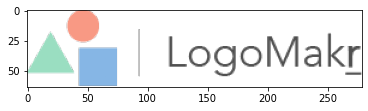

In [35]:
import matplotlib.image as mpimg

img = mpimg.imread('https://logomakr.com/storage/2021/09/logomaker.png')
imgplot = plt.imshow(img)

plt.show();

## Matplotlib-based Graphic

A lot of python libraries are based on matplotlib library. It provides a static image output. 

For example, let's take a look at distributions of math scores over gender:

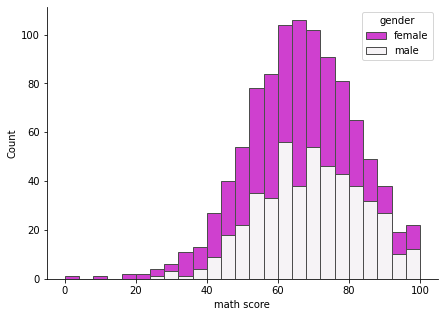

In [36]:
f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)

sns.histplot(
    dataset,
    x="math score", hue="gender",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
);

..and correlation between reading and math scores:

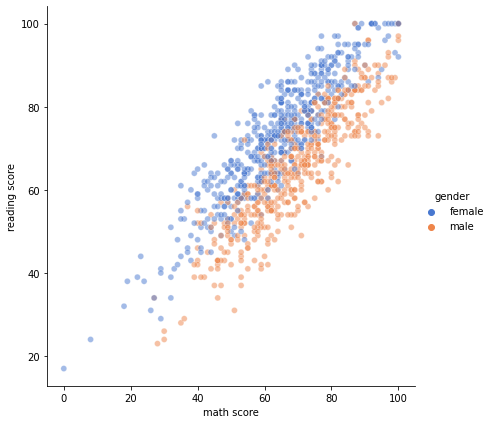

In [37]:
sns.relplot(
    x="math score", 
    y="reading score", 
    hue="gender", 
    sizes=(40, 400), 
    alpha=.5, 
    palette="muted",
    height=6, 
    data=dataset,
);

Size of the graphics can be changed:

<Figure size 1200x1600 with 0 Axes>

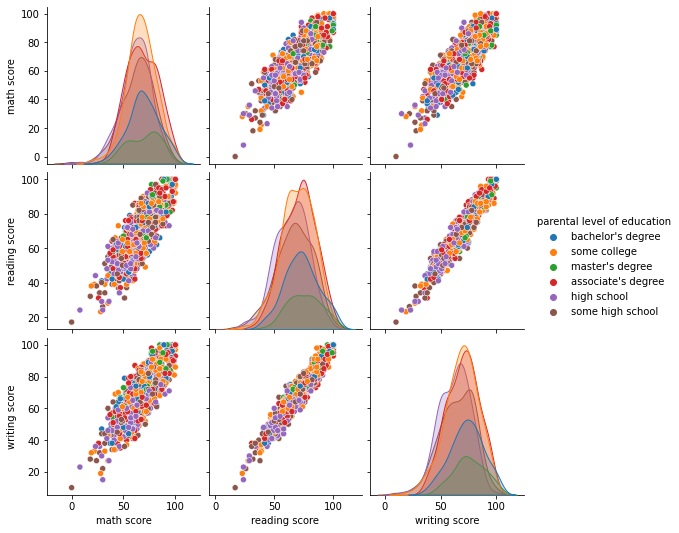

In [38]:
plt.figure(figsize=(15, 20), dpi=80)

sns.pairplot(dataset, hue="parental level of education", palette="tab10");

## Interactive Widgets

Jupyter provides a way to have interactive outputs. 

### IPyWidgets

Here is the simplest form of it (try to drag the slider and see how output got changed):

In [39]:
from ipywidgets import interact 


@interact(x=(0, 100, 10))
def p(x=50):
    print(x)

interactive(children=(IntSlider(value=50, description='x', step=10), Output()), _dom_classes=('widget-interact…

### Plotly

Plotly is another popular DataViz tool that provides interactive graphics.

For example, let's see distribution of parental level of education as a donut graph:

In [40]:
parental_education_levels = dataset["parental level of education"].value_counts()
parental_education_levels

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [41]:
fig = px.pie(values=parental_education_levels.values, names=parental_education_levels.index, title='Distribution of parental education levels')
fig.show()

Try to hover over the chart. Try to save the plot as a PNG image by clicking on the top right popup buttons

Now let's try to see what kind of surface our scores form in the 3d space:

In [42]:
fig = px.scatter_3d(dataset, x="math score", y="writing score", z="reading score", opacity=0.8, color="parental level of education")
fig.show()

Try to hover over the dots. Try to turn the chart. Try to hover over buttons in the top right block.

### Interactive Plots with Bokeh

Bokeh provides a way to have different UI control that changes the way your plots get generated:

In [43]:
from bokeh.io import output_file, show, output_notebook, push_notebook, curdoc
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, DataRange1d, Select, Div, Select, Button, ColorBar, CustomJS
from bokeh.layouts import row,column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.palettes import Blues4
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
from bokeh.transform import cumsum, linear_cmap

output_notebook()

Loading BokehJS ...

In [44]:
p = figure(plot_width=500, plot_height=500)

# add a circle renderer with a size, color, and alpha
p.circle(dataset["writing score"], dataset["math score"], size=20, color="navy", alpha=0.2)

# show the results
show(p)

In [45]:
full = pd.read_csv('./data/titanic_full.csv')
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [46]:
df2 = full[['Lifeboat', 'Pclass']].copy()

df2 = df2[(df2.Lifeboat.notna()) & (df2.Lifeboat != '?')]

df2.loc[df2.Lifeboat == '14?', 'Lifeboat'] = '14'
df2.loc[df2.Lifeboat == '15?', 'Lifeboat'] = '15'
df2.loc[df2.Lifeboat == 'A[64]', 'Lifeboat'] = 'A'

df2 = pd.get_dummies(df2, columns=['Pclass'], prefix='', prefix_sep='')

df2 = df2.groupby('Lifeboat', as_index=False).sum()

order = ['7', '5', '3', '8', '1', '6', '16', '14', '12', '9',
         '11', '13', '15', '2', '10', '4', 'C', 'D', 'B', 'A']
df2 = df2.set_index('Lifeboat').reindex(order).reset_index()

In [47]:
df2['1_per'] = df2['1'] / (df2['1'] + df2['2'] + df2['3']) * 100
df2['2_per'] = df2['2'] / (df2['1'] + df2['2'] + df2['3']) * 100
df2['3_per'] = df2['3'] / (df2['1'] + df2['2'] + df2['3']) * 100


df2['1_ang'] = df2['1_per'] / 100 * 2 * np.pi
df2['2_ang'] = df2['2_per'] / 100 * 2 * np.pi
df2['3_ang'] = df2['3_per'] / 100 * 2 * np.pi

df2.head()

df2_plot=pd.DataFrame({'class': ['Class 1', 'Class 2', 'Class 3'],
                       'percent': [float('nan'), float('nan'), float('nan')],
                       'angle': [float('nan'), float('nan'), float('nan')],
                       'color': ['#c9d9d3', '#718dbf', '#e84d60']})

In [48]:
            # Create the ColumnDataSource objects "s2" and "s2_plot"
s2 = ColumnDataSource(df2)
s2_plot = ColumnDataSource(df2_plot)

# Create the Figure object "p2"
p2 = figure(plot_width=275, plot_height=350, y_range=(-0.5, 0.7),
            toolbar_location=None, tools=['hover'], tooltips='@percent{0.0}%')

# Add circular sectors to "p2"
p2.wedge(x=0, y=0, radius=0.8, source=s2_plot,
         start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
         fill_color='color', line_color=None, legend='class')

# Change parameters of "p2"
p2.axis.visible = False
p2.grid.grid_line_color = None
p2.legend.orientation = 'horizontal'
p2.legend.location = 'top_center'

# Create the custom JavaScript callback
callback2 = CustomJS(args=dict(s2=s2, s2_plot=s2_plot), code='''
    var ang = ['1_ang', '2_ang', '3_ang'];
    var per = ['1_per', '2_per', '3_per'];
    if (cb_obj.value != 'Please choose...') {
        var boat = s2.data['Lifeboat'];
        var ind = boat.indexOf(cb_obj.value);
        for (var i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = s2.data[ang[i]][ind];
            s2_plot.data['percent'][i] = s2.data[per[i]][ind];
        }
    }
    else {
        for (var i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = undefined;
            s2_plot.data['percent'][i] = undefined;
        }

    }
    s2_plot.change.emit();
''')

# When changing the value of the dropdown menu execute "callback2"
options = ['Please choose...'] + list(s2.data['Lifeboat'])
select = Select(title='Lifeboat (in launch order)', value=options[0], options=options)
select.js_on_change('value', callback2)

# Display "select" and "p2" as a column
show(column(select, p2))